In [4]:
import numpy as np
import matplotlib.pyplot as plt


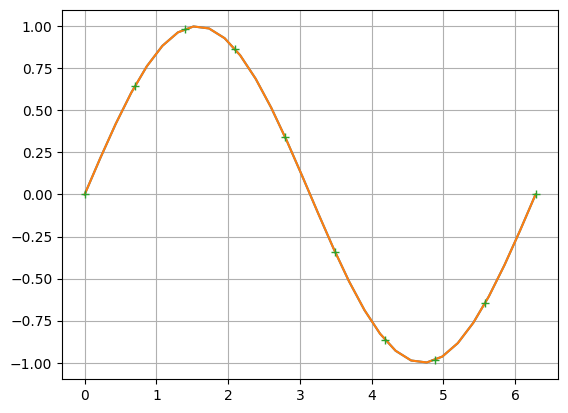

In [7]:
def Dn(i,k,Xn, Yn):
    if(i + k > len(Xn)):
        return 0
    elif k == 0:
        return Yn[i]
    return (Dn(i + 1, k-1, Xn, Yn) - Dn(i,k-1,Xn,Yn))/(Xn[i+k]- Xn[i])


def diferencia_dividida(x,nodes, images):
    result = images[0]
    prod = 1
    for k in range(1, len(nodes)):
        D = Dn(0,k ,nodes,images)
        prod *= (x - nodes[k-1])
        result += D*prod
    return result

nodes = np.linspace(0, 2*np.pi, 10)
images = np.sin(nodes)


x = np.linspace(0,2* np.pi, 30)
values = []
for value in x:
    values.append(diferencia_dividida(value,nodes,images))

plt.plot(x,values)
plt.plot(x,np.sin(x))
plt.plot(nodes, images, '+')
plt.grid()

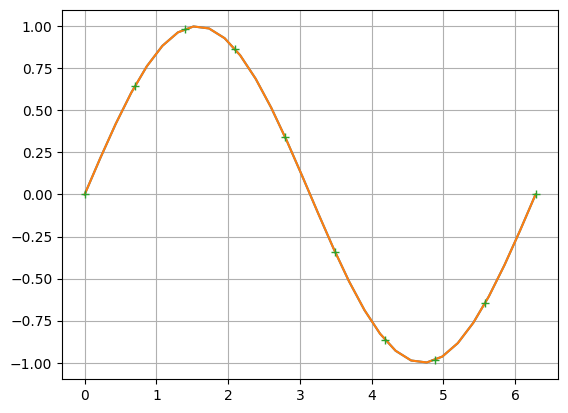

In [20]:
def Dn(Xn, Yn):
    n = len(Xn)
    D = np.zeros((n, n))
    D[0,:] = Yn
    for k in range(1, n):
        for i in range( n - k):
            D[k,i] = (D[k-1, i+1] -D[k-1, i])/(Xn[k+i]- Xn[i]) 
    return D

def diferencia_dividida(x,nodes, images):
    D = Dn(nodes,images)
    result = D[0,0] 
    prod = 1
    for k in range(1, len(nodes)):
        prod *= (x - nodes[k-1])
        result += D[k,0]*prod
    return result

nodes = np.linspace(0, 2*np.pi, 10)
images = np.sin(nodes)


x = np.linspace(0,2* np.pi, 30)
values = []
for value in x:
    values.append(diferencia_dividida(value,nodes,images))

plt.plot(x,values)
plt.plot(x,np.sin(x))
plt.plot(nodes, images, '+')
plt.grid()

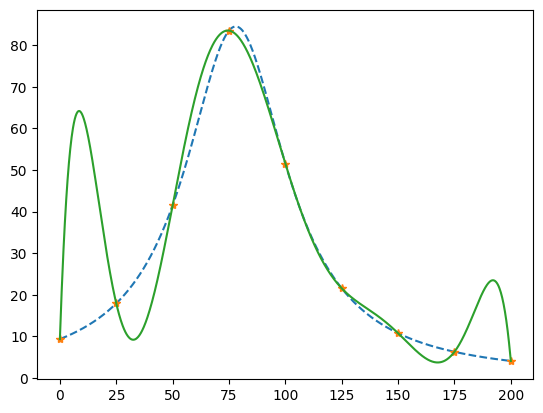

In [6]:
Er, Gamma = 78, 55
E = 75 
sigma0 = 83.5*((E - Er)**2. + Gamma**2./4.)
sigma_ana = lambda E: sigma0/((E - Er)**2. + Gamma**2./4.)

E = np.linspace(0,200,1000)
plt.plot(E,sigma_ana(E),'--',label='Analítica')


Energia  = np.arange(0,225, 25) 
sigma_exp = sigma_ana(Energia)



plt.plot(Energia,sigma_exp,"*",label='datos')

values = []
for value in E:
    values.append(diferencia_dividida(value,Energia,sigma_exp))

plt.plot(E,values)